In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

#### Merge the 12 months of sales data into a single CSV file

In [2]:
current_path = Path.cwd()
sales_data = current_path / 'Sales_Data'
datas = os.listdir(sales_data)

all_months_data = pd.DataFrame()

for file in datas:
    link = Path(sales_data) / file
    df = pd.read_csv(link)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

## Data Cleaning and Preprocessing with Pandas

In this section, we will load a CSV file into a DataFrame, handle missing values, and remove rows where any column name appears as a value in the DataFrame.

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.dropna(inplace=True)

column_names = all_data.columns
column_names = column_names.tolist()
mask = all_data.apply(lambda row: row.astype(str).isin(column_names).any(), axis = 1)
all_data = all_data[~mask]

## Extracting Time and Date from Order Date

In this section, we will extract the `Time` and `Date` from the `Order Date` column and add them as separate columns in the DataFrame.

In [4]:
Time = []
Date = []

for item in all_data['Order Date']:
    date = item.split(' ')[0]
    time = item.split(' ')[1]
    Date.append(date)
    Time.append(time)
    
all_data['Time'] = Time
all_data['Date'] = Date

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46,04/19/19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30,04/07/19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,04/12/19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,04/12/19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27,04/30/19


## Extracting City and State from Purchase Address

In this section, we will extract the `City` and `State` from the `Purchase Address` column and add them as a new column (`City`) in the `all_data` DataFrame.


In [5]:
def city(address):
    parts = address.split(", ")
    return parts[1] if len(parts) > 1 else ''  

def state(address):
    parts = address.split(", ")
    return parts[2].split(' ')[0] if len(parts) > 2 else ''  


all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{city(str(x))} ({state(str(x))})")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46,04/19/19,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30,04/07/19,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,04/12/19,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,04/12/19,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27,04/30/19,Los Angeles (CA)


#### Q1. What is best month for sales? How much was earned that month?

ADD MONTH COLUMN

In [6]:
all_data['Date'] = pd.to_datetime(all_data['Date'], format='%m/%d/%y', errors= 'coerce')
all_data['Month'] = all_data['Date'].dt.month
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,City,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46,2019-04-19,Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30,2019-04-07,Boston (MA),4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,2019-04-12,Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,2019-04-12,Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27,2019-04-30,Los Angeles (CA),4


Adding `Sales` column by multiplying `Quantity Ordered` to `Price Each`.

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,City,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46,2019-04-19,Dallas (TX),4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30,2019-04-07,Boston (MA),4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,2019-04-12,Los Angeles (CA),4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,2019-04-12,Los Angeles (CA),4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27,2019-04-30,Los Angeles (CA),4,11.99


In [8]:
Q1 = all_data[['Month','Sales']]
Q1 = Q1.groupby(['Month']).sum()

## Bar Chart of Sales Per Month

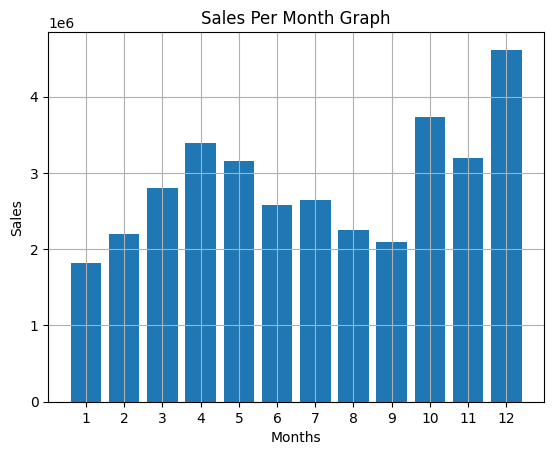

In [9]:
month = range(1,13)
plt.bar(month, Q1["Sales"])
plt.xticks(month)
plt.grid()
plt.xlabel("Months")
plt.ylabel('Sales')
plt.title('Sales Per Month Graph')
plt.show()

#### As we can see from the graph above, the best month for sales is , with 4.6 million sales.

#### Q2. Which City sold the most product

Aggregating Sales Data by City

In [10]:
Q2 = all_data[["City", "Sales"]]
Q2 = Q2.groupby(['City']).sum().reset_index()
Q2


,City,Sales
0,Atlanta (GA),2795498.58
1,Austin (TX),1819581.75
2,Boston (MA),3661642.01
3,Dallas (TX),2767975.40
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
6,Portland (ME),449758.27
7,Portland (OR),1870732.34
8,San Francisco (CA),8262203.91
9,Seattle (WA),2747755.48


## Bar Chart of Sales per City

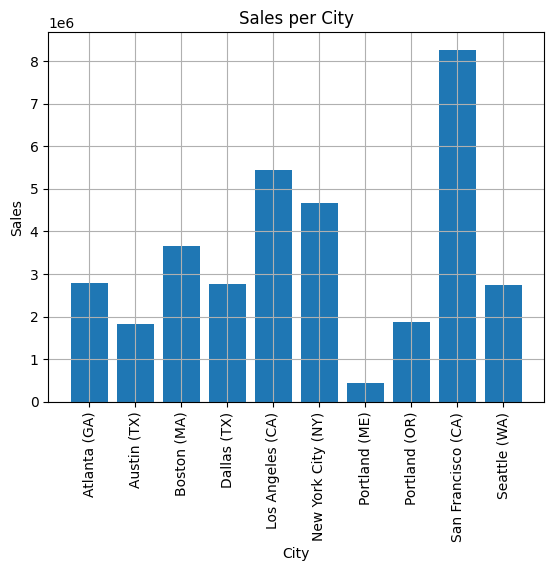

In [11]:
plt.bar(Q2["City"], Q2["Sales"])
plt.grid()
plt.xticks(rotation = 'vertical')
plt.title("")
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Sales per City")
plt.show()

#### San Francisco (CA) have the most sales out of the cities

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

#### Add Time Column

In [12]:
all_data['Time'] = pd.to_datetime(all_data['Time'], format='%H:%M', errors='coerce')
all_data['Hour'] = all_data['Time'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,City,Month,Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",1900-01-01 08:46:00,2019-04-19,Dallas (TX),4,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1900-01-01 22:30:00,2019-04-07,Boston (MA),4,99.99,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1900-01-01 14:38:00,2019-04-12,Los Angeles (CA),4,600.00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1900-01-01 14:38:00,2019-04-12,Los Angeles (CA),4,11.99,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1900-01-01 09:27:00,2019-04-30,Los Angeles (CA),4,11.99,9


In [13]:
Q3 = all_data[["Hour", "Order ID"]]
Q3 = Q3.groupby("Hour").count().reset_index()

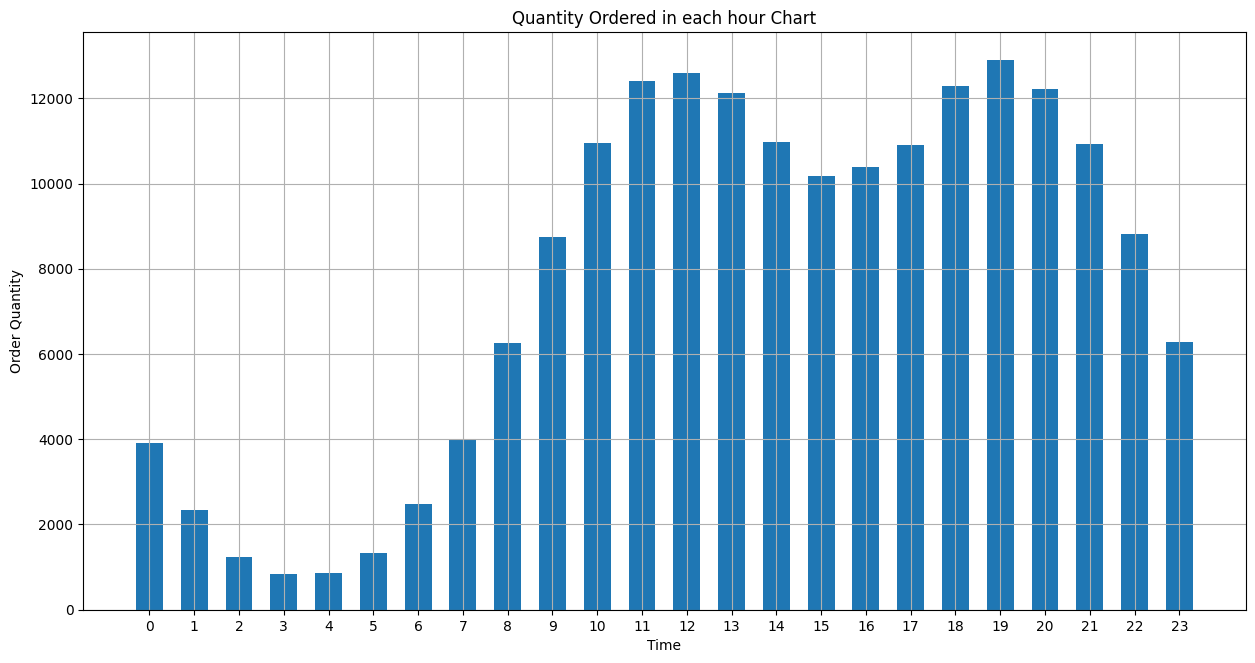

In [16]:
plt.figure(figsize=(15, 7.5))
plt.bar(Q3["Hour"], Q3['Order ID'],width=0.6)
plt.grid()
plt.xticks(Q3["Hour"])
plt.xlabel('Time')
plt.ylabel('Order Quantity')
plt.title('Quantity Ordered in each hour Chart')
plt.show()

#### Question 4: What products are most often sold together?

In [ ]:
print(type(all_data['Purchase Address'][0]))

<class 'str'>


In [ ]:
initial = all_data['Purchase Address'].str.split(",").str.get(2).str.split(" ").str.get(1)
all_data['City'] = all_data['Purchase Address'].str.split(",").str.get(1).str.strip() + " ("+ initial +")"


In [ ]:
temp_df = all_data[['Order ID',	'Quantity Ordered',	'Price Each', 'Sales','City']]
temp_df.head()


,Order ID,Quantity Ordered,Price Each,Sales,City
0,176558,2,11.95,23.90,Dallas (TX)
2,176559,1,99.99,99.99,Boston (MA)
3,176560,1,600.00,600.00,Los Angeles (CA)
4,176560,1,11.99,11.99,Los Angeles (CA)
5,176561,1,11.99,11.99,Los Angeles (CA)


In [ ]:
temp_df.set_index('Order ID', inplace=True)

In [ ]:
Q2 = pd.DataFrame
Q2 = temp_df.groupby('City').sum()
Q2

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


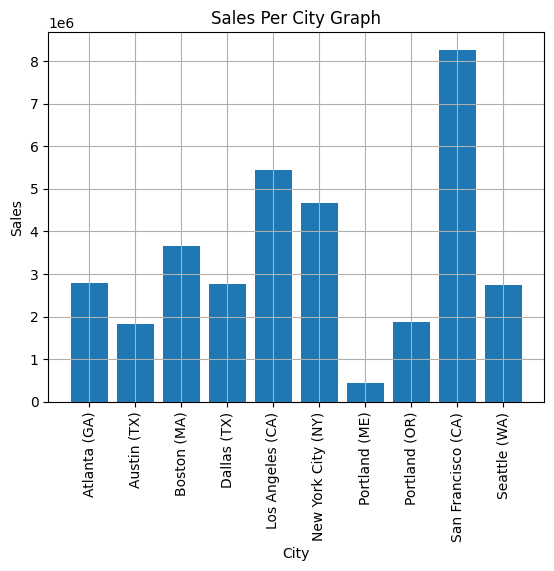

In [ ]:
City = Q2.index
plt.bar(City, Q2['Sales'])
plt.grid()
plt.xlabel("City")
plt.xticks(rotation='vertical')
plt.ylabel('Sales')
plt.title('Sales Per City Graph')
plt.show()

In [ ]:
all_data.tail(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,Month,City,Sales
186799,259310,Apple Airpods Headphones,1,150.00,09/15/19 19:08,"309 Elm St, Los Angeles, CA 90001",19:08:00,2019-09-15,9,Los Angeles (CA),150.00
186800,259311,Flatscreen TV,1,300.00,09/18/19 14:54,"930 North St, Seattle, WA 98101",14:54:00,2019-09-18,9,Seattle (WA),300.00
186801,259312,Wired Headphones,1,11.99,09/02/19 19:51,"573 Sunset St, San Francisco, CA 94016",19:51:00,2019-09-02,9,San Francisco (CA),11.99
186802,259313,Bose SoundSport Headphones,1,99.99,09/05/19 11:34,"138 2nd St, Los Angeles, CA 90001",11:34:00,2019-09-05,9,Los Angeles (CA),99.99
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",00:25:00,2019-09-16,9,Atlanta (GA),11.99
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",00:25:00,2019-09-16,9,Atlanta (GA),5.98
186805,259315,Lightning Charging Cable,1,14.95,09/29/19 16:20,"112 5th St, Boston, MA 02215",16:20:00,2019-09-29,9,Boston (MA),14.95
186806,259316,AAA Batteries (4-pack),1,2.99,09/16/19 16:48,"369 Johnson St, Atlanta, GA 30301",16:48:00,2019-09-16,9,Atlanta (GA),2.99
186807,259317,Lightning Charging Cable,1,14.95,09/26/19 21:12,"151 1st St, New York City, NY 10001",21:12:00,2019-09-26,9,New York City (NY),14.95
186808,259318,AAA Batteries (4-pack),1,2.99,09/30/19 10:05,"524 Hickory St, Boston, MA 02215",10:05:00,2019-09-30,9,Boston (MA),2.99


In [ ]:
Q3 = all_data[['Order Date', 'Quantity Ordered']]
Q3['Time'] = Q3['Order Date'].str.split(" ").str.get(1)
Q3


C:\Users\User\AppData\Local\Temp\ipykernel_13284\776426679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q3['Time'] = Q3['Order Date'].str.split(" ").str.get(1)


,Order Date,Quantity Ordered,Time
0,04/19/19 08:46,2,08:46
2,04/07/19 22:30,1,22:30
3,04/12/19 14:38,1,14:38
4,04/12/19 14:38,1,14:38
5,04/30/19 09:27,1,09:27
...,...,...,...
186845,09/17/19 20:56,3,20:56
186846,09/01/19 16:00,1,16:00
186847,09/23/19 07:39,1,07:39
186848,09/19/19 17:30,1,17:30


In [ ]:
Q3['Time'] = Q3['Time'].str.split(":").str.get(0)
Q3 =Q3.groupby('Time', as_index=False)['Quantity Ordered'].sum()
Q3.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13284\849583490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q3['Time'] = Q3['Time'].str.split(":").str.get(0)


,Time,Quantity Ordered
0,00,4428
1,01,2619
2,02,1398
3,03,928
4,04,937


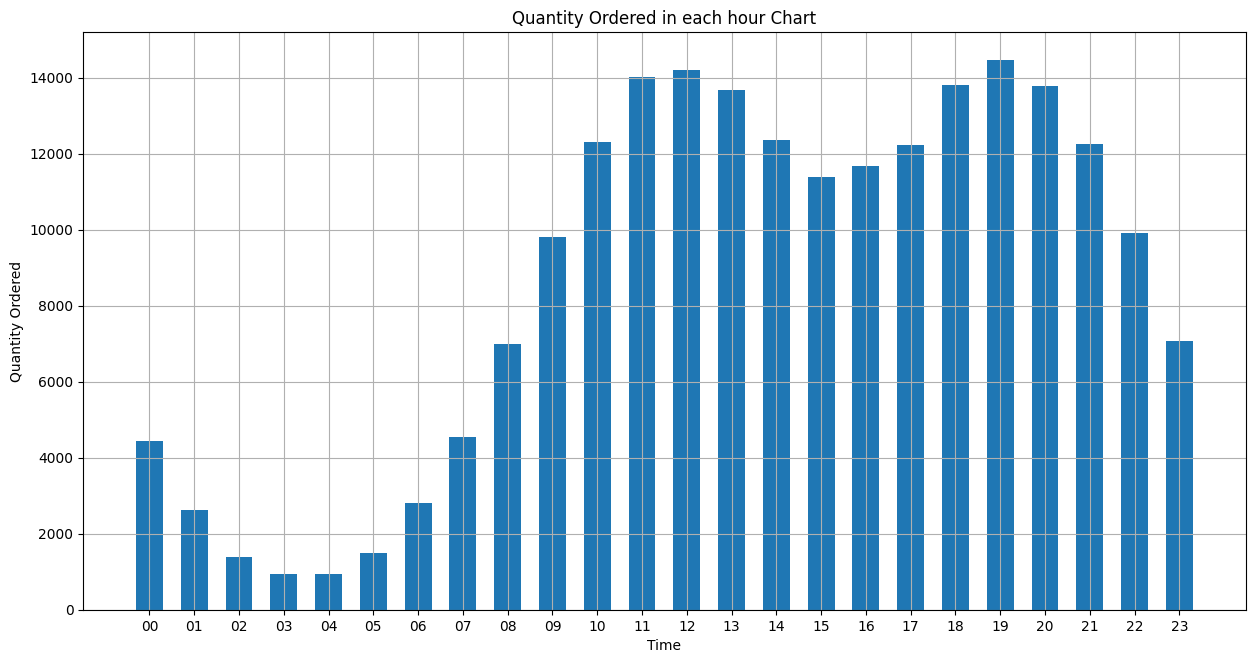

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.bar(Q3["Time"], Q3['Quantity Ordered'],width=0.6)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered in each hour Chart')
plt.show()

([<matplotlib.axis.XTick at 0x198efa8bfe0>,
 [Text(0.0, 0, '00'),
  Text(1.0, 0, '01'),
  Text(2.0, 0, '02'),
  Text(3.0, 0, '03'),
  Text(4.0, 0, '04'),
  Text(5.0, 0, '05'),
  Text(6.0, 0, '06'),
  Text(7.0, 0, '07'),
  Text(8.0, 0, '08'),
  Text(9.0, 0, '09'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22'),
  Text(23.0, 0, '23')])

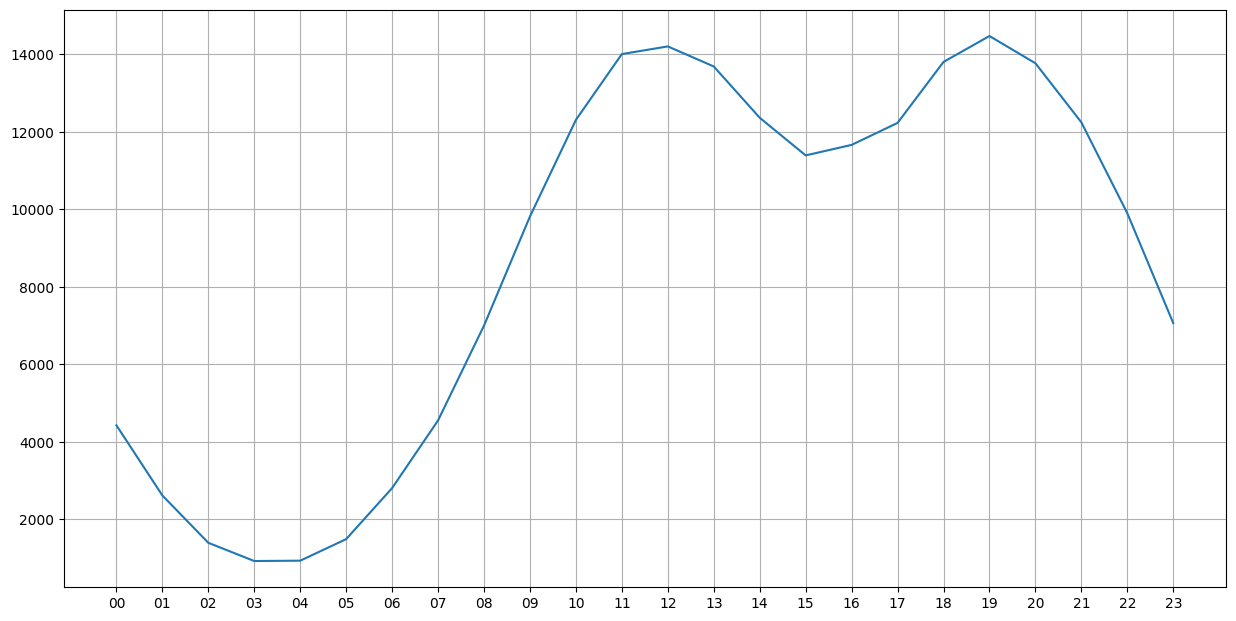

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.grid()
plt.plot(Q3['Time'], Q3['Quantity Ordered'])
plt.xticks(Q3['Time'])

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46:00,2019-04-19,4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30:00,2019-04-07,4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38:00,2019-04-12,4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38:00,2019-04-12,4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27:00,2019-04-30,4,Los Angeles (CA),11.99


In [ ]:
Q4 = all_data[all_data['Order ID'].duplicated(keep=False)]

In [ ]:
Q4['Grouped'] = Q4.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
Q4.head(10)
Q4 = Q4[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\User\AppData\Local\Temp\ipykernel_13284\2084093495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q4['Grouped'] = Q4.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [ ]:
Q4.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [ ]:
Grocery = {}
for items in Q4['Grouped']:
    if items not in Grocery:
        Grocery[items]=1
    elif items in Grocery:
        Grocery[items]+=1
        
Grocery = dict(sorted(Grocery.items(), key=lambda item: item[1],reverse=True))
New_Q4 = pd.DataFrame(list(Grocery.items()), columns = ['Items', 'Count'])
New_Q4.head(20)

    

,Items,Count
0,"iPhone, Lightning Charging Cable",882
1,"Google Phone, USB-C Charging Cable",856
2,"iPhone, Wired Headphones",361
3,"Vareebadd Phone, USB-C Charging Cable",312
4,"Google Phone, Wired Headphones",303
5,"iPhone, Apple Airpods Headphones",286
6,"Google Phone, Bose SoundSport Headphones",161
7,"Vareebadd Phone, Wired Headphones",104
8,"Google Phone, USB-C Charging Cable, Wired Head...",77
9,"Vareebadd Phone, Bose SoundSport Headphones",60


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in Q4['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common()

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80),
 ((' Lightning Charging Cable', ' Wired Headphones'), 62),
 (('Lightning Charging Cable', ' USB-C Charging Cable'), 55),
 (('Lightning Charging Cable', ' AA Batteries (4-pack)'), 52),
 ((' USB-C Charging Cable', ' Bose SoundSport Headphones'), 51),
 (('Lightning Charging Cable', ' Lightning Charging Cable'), 51),
 (('AA Batteries (4-pack)', ' Lightning Charging Cable'), 51),
 (('AAA Batteries (4-pack)', ' USB-C Charging Cable'), 50),
 (('AA Batteries (4-pack)', ' AAA Batteries (4-p

In [ ]:
Q5 = all_data[['Quantity Ordered', 'Product']]
Q5.groupby('Product',as_index=False).sum()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


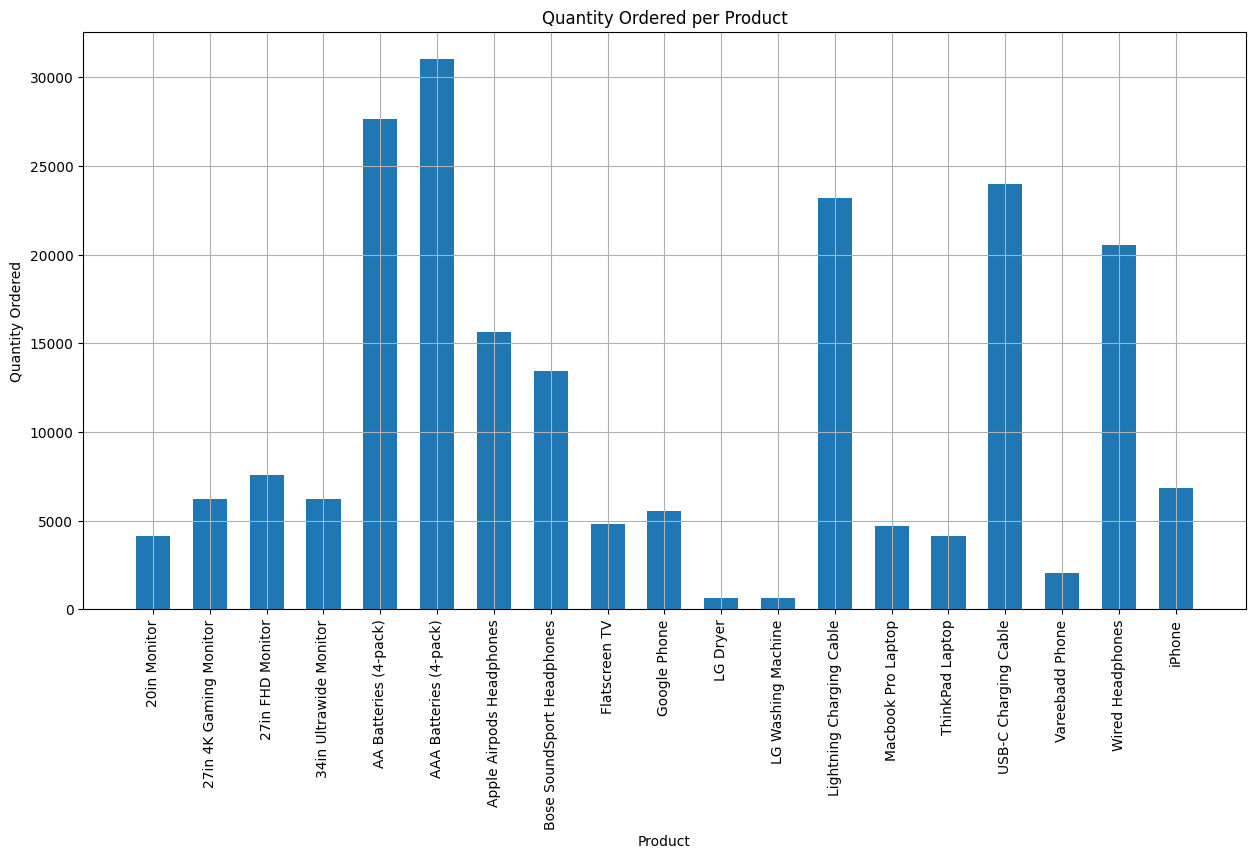

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.bar(Q5.groupby('Product', as_index=False).sum()['Product'], Q5.groupby('Product',as_index=False).sum()['Quantity Ordered'],width=0.6)
plt.grid()
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Product')
plt.xticks(rotation ='vertical')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13284\2462520188.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Product,rotation='vertical')


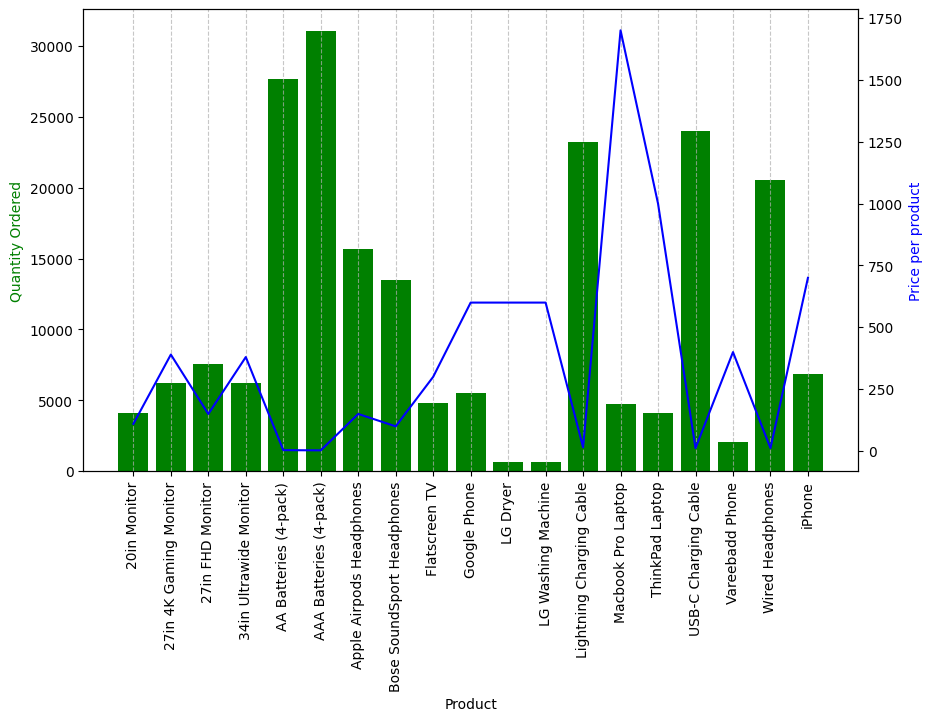

In [ ]:
Product = [product for product in Q5.groupby('Product',as_index=False).sum()['Product']]
quantity_ordered = Q5.groupby('Product').sum()['Quantity Ordered']
prices = all_data.groupby('Product')['Price Each'].mean()
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.bar(Product, quantity_ordered, color='g')
ax2.plot(Product, prices, color='b')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price per product', color='b')
ax1.set_xticklabels(Product,rotation='vertical')

ax1.grid(True, linestyle='--', alpha=0.7, which='major', axis='x')


plt.show()